# Keras mini-Homework
----------------

## 資料集介紹:
* keras內建資料集
* __11228條__來自路透社的短新聞, 其中每個單字皆被轉成單字索引, 因此每個樣本都是一個__整數list__
* 新聞共被分為__46類__, 每類至少包含10個樣本

## 作業目標:
1. 搭建一個__多分類__的神經網路
2. 做驗證, 至少達到__75%__以上的準確率

> __hint__: 與範例程式碼介紹的例子不同的地方在於, 這是一個__多分類__問題!!

### (1) load data
* 僅使用前10000個常出現的單字, 其他單字將會被捨棄!!目的是使資料量不要太大

In [32]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import reuters

(train_x, train_y), (test_x, test_y) = reuters.load_data(num_words = 10000)

* train data有8982筆          
* test data有2246筆  

In [12]:
len(train_x), len(test_x)

(8982, 2246)

* 樣本(train_x)都是整數list

In [3]:
train_x[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

* 分類結果(train_y)用整數表示

In [4]:
train_y[0]

3

* 好奇的話, 可以把下載單字索引, 把數字所以轉回單字  
單字索引的'0', '1', '2'為保留的索引, 所以每個索引值要減去3才能正確解碼

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_news = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_x[0]])

decoded_news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### (2)資料前處理
* 使train_x, test_x變成len(每筆新聞) * 10000的矩陣, 例如某筆新聞就會變成:  

| word_index | 3 | 4 | 5 |6 | 7 | 8...|
|---|---|---|---|---|---|---|
news[0]|0|0|1|0|0|0|
news[1]|0|0|0|0|0|1|
news[2]|0|0|0|0|1|0|
news[3]|0|0|0|1|0|0|
news[4]|0|0|1|0|0|0|

* train_y, test_y使用one-hot編碼

In [33]:
import numpy as np

def vectorize_sequences(news, dimension = 10000):
    results = np.zeros((len(news), dimension))
    for i, news in enumerate(news):
        results[i, news] = 1.
    return results

train_x_matrix = vectorize_sequences(train_x)
test_x_matrix = vectorize_sequences(test_x)

In [34]:
from tensorflow.keras.utils import to_categorical

train_y_onehot = to_categorical(train_y)
test_y_onehot = to_categorical(test_y)

### (3)建構網路

In [50]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

# 因為要分的類別較多, 所以比起二分類資料, 可能要使用大一點的維度
network.add(layers.Dense(64, activation = 'relu', input_shape=(10000, )))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
# 中間可以再加更多層, 自己決定
network.add(layers.Dense(46, activation = 'softmax'))

network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['acc'])

* 從train_x_matrix, train_y_onehot拿一些驗證資料集

In [36]:
validation_x = train_x_matrix[:1000]
train_x_matrix_part = train_x_matrix[1000:]

validation_y = train_y_onehot[:1000]
train_y_onehot_part = train_y_onehot[1000:]

* 開始訓練

In [51]:
history = network.fit(train_x_matrix_part,
                      train_y_onehot_part,
                      epochs =  20,
                      batch_size =  32,
                      validation_data = (validation_x, validation_y))

Epoch 1/20
250/250 [==============================] - 2s 8ms/step - loss: 1.4818 - acc: 0.6676 - val_loss: 1.1040 - val_acc: 0.7450
Epoch 2/20
250/250 [==============================] - 2s 8ms/step - loss: 0.8003 - acc: 0.8213 - val_loss: 0.9178 - val_acc: 0.8120
Epoch 3/20
250/250 [==============================] - 2s 8ms/step - loss: 0.5042 - acc: 0.8891 - val_loss: 0.9341 - val_acc: 0.8130
Epoch 4/20
250/250 [==============================] - 2s 8ms/step - loss: 0.3505 - acc: 0.9241 - val_loss: 0.9825 - val_acc: 0.8230
Epoch 5/20
250/250 [==============================] - 2s 8ms/step - loss: 0.2691 - acc: 0.9407 - val_loss: 1.1361 - val_acc: 0.7980
Epoch 6/20
250/250 [==============================] - 2s 8ms/step - loss: 0.2225 - acc: 0.9481 - val_loss: 1.2352 - val_acc: 0.8140
Epoch 7/20
250/250 [==============================] - 2s 8ms/step - loss: 0.2005 - acc: 0.9520 - val_loss: 1.1846 - val_acc: 0.8000
Epoch 8/20
250/250 [==============================] - 2s 8ms/step - loss: 0.

### (4)驗證結果

* 觀察fit幾次會開始overfit(用acc評估)

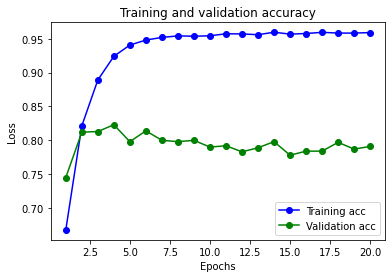

In [52]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'go-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

* 用剛剛得知的結果, 輸入適合的epoch並重新訓練

In [53]:
network_new = models.Sequential()

# 因為要分的類別較多, 所以比起二分類資料, 可能要使用大一點的維度
network_new.add(layers.Dense(64, activation = 'relu', input_shape=(10000, )))
network_new.add(layers.Dense(64, activation = 'relu'))
network_new.add(layers.Dense(64, activation = 'relu'))
# 中間可以再加更多層, 自己決定
network_new.add(layers.Dense(46, activation = 'softmax'))

network_new.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['acc'])

history_new = network_new.fit(train_x_matrix_part,
                          train_y_onehot_part,
                          epochs =  5,
                          batch_size =  32)

Epoch 1/5
250/250 [==============================] - 2s 8ms/step - loss: 1.4827 - acc: 0.6636
Epoch 2/5
250/250 [==============================] - 2s 8ms/step - loss: 0.7894 - acc: 0.8212
Epoch 3/5
250/250 [==============================] - 2s 8ms/step - loss: 0.4994 - acc: 0.8887
Epoch 4/5
250/250 [==============================] - 2s 8ms/step - loss: 0.3502 - acc: 0.9240
Epoch 5/5
250/250 [==============================] - 2s 8ms/step - loss: 0.2678 - acc: 0.9389


In [54]:
results = network_new.evaluate(test_x_matrix, test_y_onehot)

71/71 [==============================] - 0s 2ms/step - loss: 1.2555 - acc: 0.7925


* 如果隨便猜的答對率應該是19%左右

In [22]:
# 展示一個亂猜的過程
import copy

test_y_copy = copy.copy(test_y)
np.random.shuffle(test_y_copy)

float(np.sum(np.array(test_y) == np.array(test_y_copy))) / len(test_y)

0.19902048085485308

### 答對了ㄇ??